The simplest neural network. Generate some data to approx sin(\pi * x) on an interval -1 \leq x \leq 1

Import Statements

In [97]:
import os
import torch
import torchvision
from torch import nn 
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from torch.utils.data import Dataset
import pyDOE2

Some Variables

In [98]:
n = 200 #num data points

Data Generation

In [99]:
np.random.seed(0)

#generate n random data points between -1 and 1

input_values = np.random.rand(n) * 2 - 1

#labels of sin(\pi * x) for each x in Say
label_values = np.sin(input_values * np.pi)



Neural Network

In [100]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.predict = nn.Sequential(
            nn.Linear(1, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        x = self.predict(x)
        return x


Model Training Parameters

In [101]:
network = Network()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(network.parameters())

num_epochs = 500

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device: " + ("GPU" if torch.cuda.is_available() else "CPU"))
network.to(device)

input_data = torch.tensor(input_values.astype(np.float32)).to(device).view(-1, 1)
label_data = torch.tensor(label_values.astype(np.float32)).to(device).view(-1, 1)

Using device: CPU


Model Training

In [102]:
for epoch in range(num_epochs):

    output = network(input_data)
    loss = criterion(output, label_data)

    print(loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

0.5202014446258545
0.5187715291976929
0.5173795223236084
0.5160266160964966
0.514712393283844
0.5135195851325989
0.5124984383583069
0.5115081667900085
0.5105410218238831
0.509596586227417
0.5087277889251709
0.5079467296600342
0.5072233080863953
0.5065086483955383
0.5058050751686096
0.505124032497406
0.5044612288475037
0.5038119554519653
0.5031806826591492
0.5025699138641357
0.5019787549972534
0.5014052987098694
0.5008476376533508
0.5003061890602112
0.49978041648864746
0.49927398562431335
0.4988526403903961
0.4984143078327179
0.4979490637779236
0.4974786639213562
0.49705561995506287
0.4966585636138916
0.49626708030700684
0.49588149785995483
0.495503306388855
0.49513423442840576
0.49477478861808777
0.4944249093532562
0.4940188229084015
0.4936962127685547
0.4933750629425049
0.4930456280708313
0.4927085041999817
0.49236148595809937
0.49200141429901123
0.4916257858276367
0.49123331904411316
0.4908311367034912
0.49040478467941284
0.4899376928806305
0.48942944407463074
0.4888851046562195
0.48

Graphing

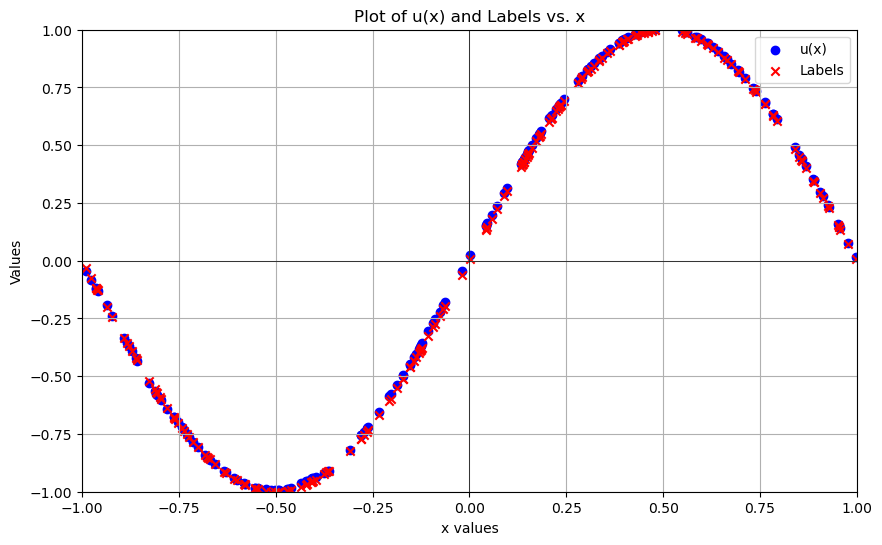

In [106]:
def plot_tensors(x, u, labels):
    # Convert tensors to numpy arrays
    x_np = x
    u_np = u

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_np, u_np, color='blue', marker='o', label='u(x)')
    
    if labels is not None:
        labels_np = labels
        plt.scatter(x_np, labels_np, color='red', marker='x', label='Labels')
    
    plt.title('Plot of u(x) and Labels vs. x')
    plt.xlabel('x values')
    plt.ylabel('Values')
    plt.grid(True)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.legend()
    plt.show()

# Example usage:
x = input_values
u = network(torch.Tensor(input_values.astype(np.float32)).view(-1,1)).detach().numpy()

plot_tensors(x, u, label_values)